<a href="https://colab.research.google.com/github/AlexFMo/statistical-process-control/blob/main/SPS_case_studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Statistical Process Control - Case studies**

Case Study 1. Process Downtimes

Case Study 2. %NG

Case Study 3. Errors in 2 weeks

Case Study 4. Reasons for leaving

Case Study 5. Battery Capacity

Case Study 6. Temperature CT Room QC Lab

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
url = 'https://github.com/AlexFMo/statistical-process-control/raw/refs/heads/main/files/Imported%20Excel%20File.xlsx'
# data = pd.read_excel(url, engine='openpyxl')
data = pd.read_excel(url, header = 1)
data

,Time Operation 1,Time Operation 2,Time Operation 3,Total Times
0,30.005306,30.594611,30.403448,91.003364
1,28.844357,30.159462,30.579663,89.583482
2,31.973042,27.939058,28.589332,88.501432
3,31.088777,29.739512,29.650302,90.478592
4,29.722299,30.893330,31.256002,91.871631
5,29.368775,29.991130,30.630144,89.990050
6,29.480859,29.912718,30.773113,90.166689
7,29.449450,28.486751,30.813170,88.749372
8,31.066764,28.520472,29.975085,89.562321
9,30.334792,30.864839,32.201969,93.401600


## Case Study 5. Battery Capacity


* The customer has requested  to make a study of the remaining battery capacity and see if it is correlating to the mileage used.
* Data was captured from different customers, and analysed with Minitab.
* Use the data to determine if there is a positive, negative, or no correlation.


In [ ]:
url_battery_capacity = 'https://github.com/AlexFMo/statistical-process-control/raw/refs/heads/main/files/battery_data_exercises.xlsx'
data = pd.read_excel(url_battery_capacity, sheet_name='Sheet5')
data.head()

,Mileage,Remaining Battery Capacity
0,2113,1.015190
1,16800,0.987755
2,15845,0.964206
3,37352,0.976636
4,821,1.016000


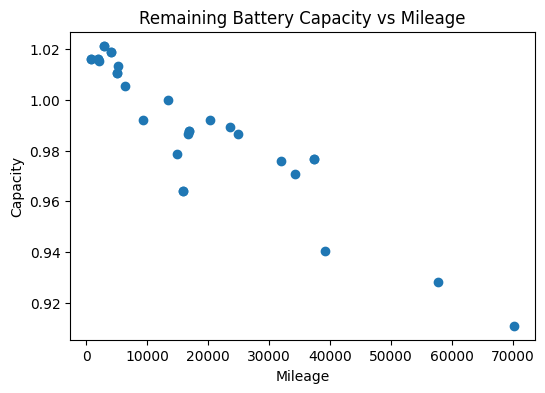

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(data['Mileage'], data['Remaining Battery Capacity'])
ax.set_xlabel('Mileage')
ax.set_ylabel('Capacity')
plt.title('Remaining Battery Capacity vs Mileage')
plt.show()

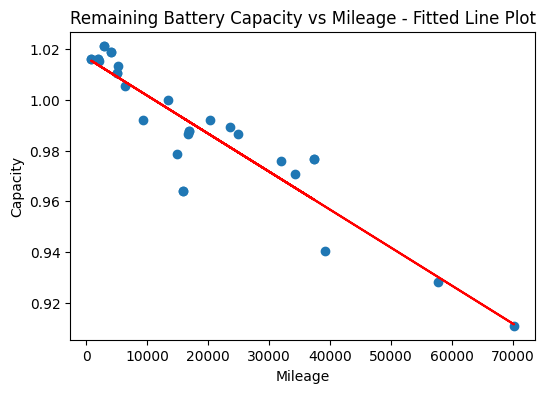

In [ ]:
# Calculate the linear regression line
x = data['Mileage']
y = data['Remaining Battery Capacity']
slope, intercept = np.polyfit(x, y, 1)
line = slope * x + intercept

# Plot the scatter plot and the fitted line
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x, y)
ax.plot(x, line, color='red')
ax.set_xlabel('Mileage')
ax.set_ylabel('Capacity')
plt.title('Remaining Battery Capacity vs Mileage - Fitted Line Plot')
plt.show()
